In [1]:
# from Question_1 import load_csv_file,load_pd_file
import matplotlib.pyplot as plt
import pandas as pd
file_location = "device_features.csv"
loaded_data_pd = pd.read_csv(file_location)
print(f"\nFetching data...\nSuccessfully loaded the {file_location} dataset.")


Fetching data...
Successfully loaded the device_features.csv dataset.


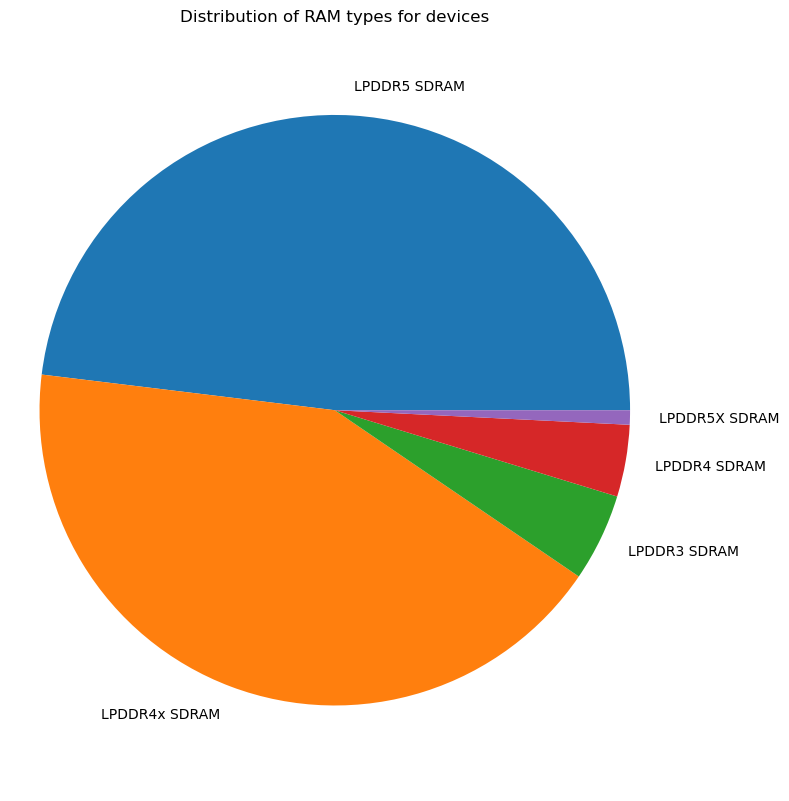

In [2]:
# Create a chart to visually represent the proportion of RAM types for devices in the current market
def ram_type_proportion():
    # loaded_data_pd= load_pd_file()
    ram_counts = loaded_data_pd['ram_type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(ram_counts.values, labels=ram_counts.index)
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Distribution of RAM types for devices')

    plt.show()


ram_type_proportion()

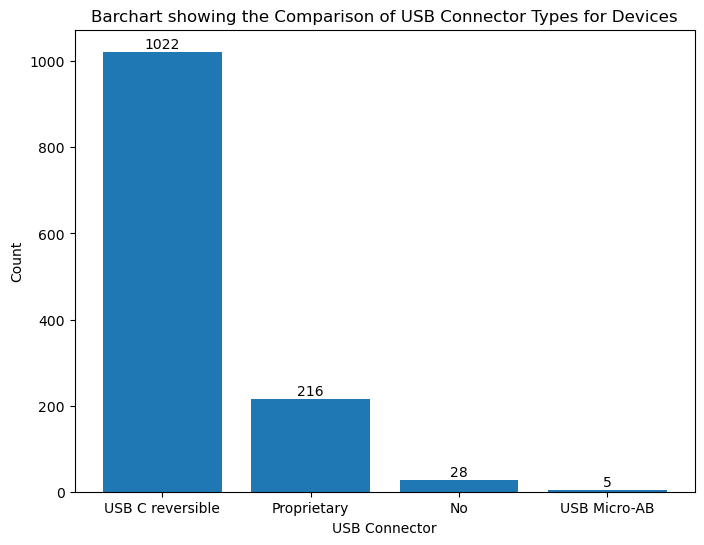

In [3]:
# Create a chart to visually compare the number of devices for each USB connector type
def usb_connector_comparison():
    usb_connector_counts = loaded_data_pd['usb_connector'].value_counts()
    # Create the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(usb_connector_counts.index, usb_connector_counts.values)

    # Set labels and title
    plt.xlabel('USB Connector')
    plt.ylabel('Count')
    plt.title('Barchart showing the Comparison of USB Connector Types for Devices')
    
    # Display the counts above the bars
    for index, value in enumerate(usb_connector_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')
    

    plt.show()
    
usb_connector_comparison()

In [4]:
loaded_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   oem_id                        1271 non-null   object 
 1   brand                         1271 non-null   object 
 2   model                         1271 non-null   object 
 3   released_date                 1271 non-null   object 
 4   announced_date                1271 non-null   object 
 5   hardware_designer             1271 non-null   object 
 6   manufacturer                  1271 non-null   object 
 7   codename                      1271 non-null   object 
 8   general_extras                1271 non-null   object 
 9   device_category               1271 non-null   object 
 10  width                         1271 non-null   float64
 11  height                        1271 non-null   float64
 12  depth                         1271 non-null   float64
 13  dim

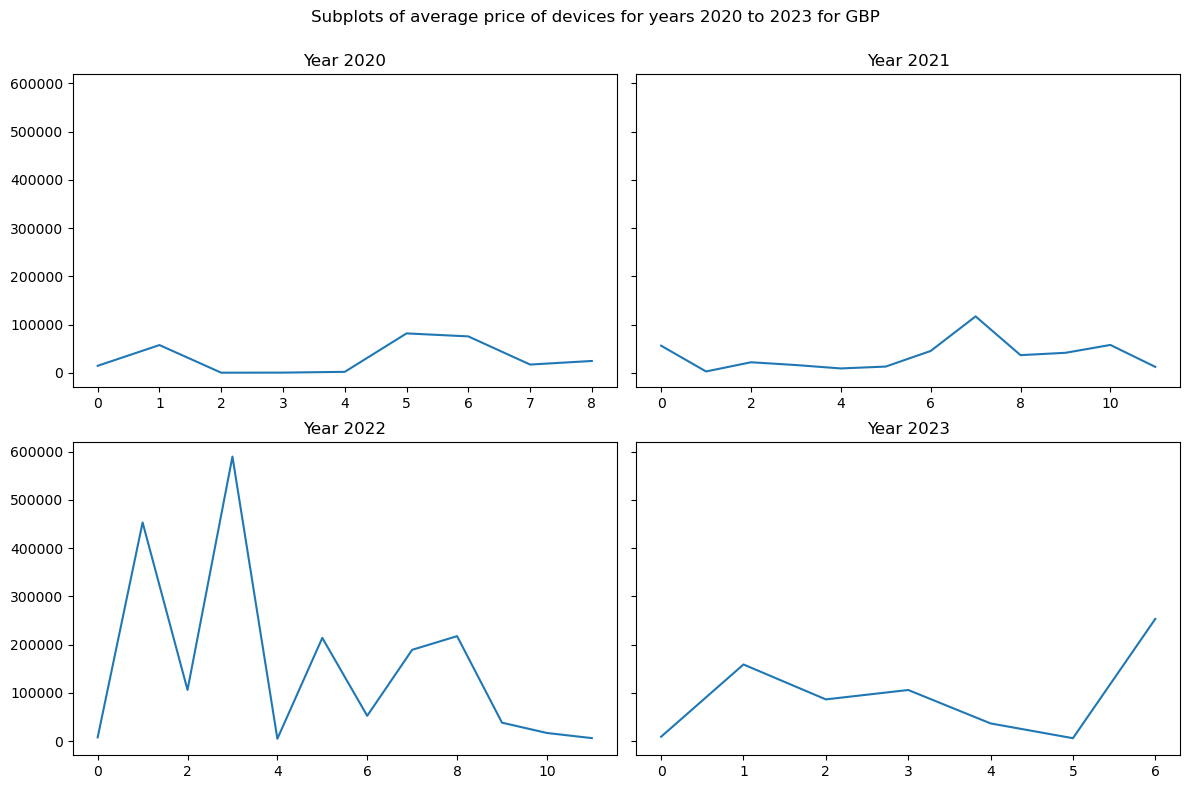

In [11]:
def subplot_GBP():
    # Assuming 'released_date' is in the format 'dd-mm-yyyy'
    loaded_data_pd['released_date'] = pd.to_datetime(loaded_data_pd['released_date'], format='%d-%m-%y')

    # Extract the years and create a new column
    loaded_data_pd['released_year'] = loaded_data_pd['released_date'].dt.year
    loaded_data_pd['released_month'] = loaded_data_pd['released_date'].dt.month

    # Display the DataFrame with the brand and released year
    # print(loaded_data_pd['released_year'])

    # Split the data by year into separate DataFrames
    yearly_data = {}
    for year, data in loaded_data_pd.groupby('released_year'):
        yearly_data[year] = data

    GBP_2020 = yearly_data[2020]
    GBP_2021 = yearly_data[2021]
    GBP_2022 = yearly_data[2022]
    GBP_2023 = yearly_data[2023]
    # Group by year and month and calculate the average price for each month
    monthly_average_prices_2020 = GBP_2020.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2021 = GBP_2021.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2022 = GBP_2022.groupby(['released_year', 'released_month'])['price'].mean().reset_index()
    monthly_average_prices_2023 = GBP_2023.groupby(['released_year', 'released_month'])['price'].mean().reset_index()

    monthly_average_prices_2020.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2021.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2022.rename(columns={'price': 'average_price(GBP)'}, inplace=True)
    monthly_average_prices_2023.rename(columns={'price': 'average_price(GBP)'}, inplace=True)


    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

    # Plot line graph for Year 2019
    axs[0, 0].plot(monthly_average_prices_2020['average_price(GBP)'])
    axs[0, 0].set_title('Year 2020')

    # Plot line graph for Year 2020
    axs[0, 1].plot(monthly_average_prices_2021['average_price(GBP)'])
    axs[0, 1].set_title('Year 2021')

    # Plot line graph for Year 2021
    axs[1, 0].plot(monthly_average_prices_2022['average_price(GBP)'])
    axs[1, 0].set_title('Year 2022')

    # Plot line graph for Year 2022
    axs[1, 1].plot(monthly_average_prices_2023['average_price(GBP)'])
    axs[1, 1].set_title('Year 2023')

    # Adjust spacing between subplots
    fig.tight_layout()
    fig.suptitle('Subplots of average price of devices for years 2020 to 2023 for GBP')
    plt.subplots_adjust(top=0.9)
    # Show the plot
    plt.show()
    
subplot_GBP()